# Load Processed Data 

total 3154
-rw-r--r-- 1 khyat 197609 3124181 Sep 26 15:50 Airbnb.pptx
drwxr-xr-x 1 khyat 197609       0 Oct  1 13:05 Data
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:22 Data_Original
drwxr-xr-x 1 khyat 197609       0 Oct  3 22:57 Data_Output
-rw-r--r-- 1 khyat 197609      25 Oct  3 22:59 README.md
drwxr-xr-x 1 khyat 197609       0 Oct  3 22:57 Scripts
drwxr-xr-x 1 khyat 197609       0 Oct  4 05:21 Visualization_Output
-rw-r--r-- 1 khyat 197609   87023 Oct  4 04:37 treeClassifier.txt
-rw-r--r-- 1 khyat 197609     165 Sep 26 13:19 ~$Airbnb.pptx
                                                    id      name   summary  \
id                                            1.000000  0.014634 -0.004714   
name                                          0.014634  1.000000  0.054027   
summary                                      -0.004714  0.054027  1.000000   
description                                  -0.004469  0.054168  0.999557   
experiences_offered                           0.045731 -0.006

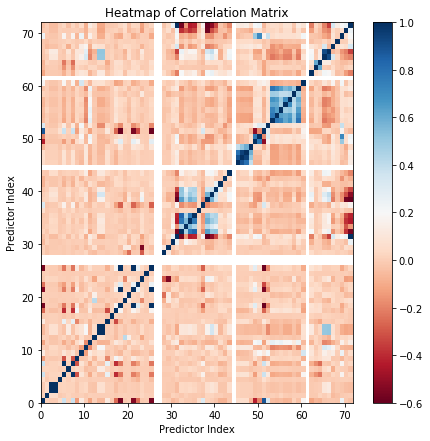

In [1]:
%run ./Airbnb_DataSource_n_DataWrangling.ipynb

In [2]:
df.head(n=2)
# print(df.shape)

,id,name,summary,description,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_group,room_type_num
1,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Lots of windows and light. St Luke's Gardens ...,romantic,60302,Philippa,2009-12-05,"Kensington, England, United Kingdom",within a day,100%,1.0,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,t,"London, United Kingdom",RB of Kensington and Chelsea,Kensington and Chelsea,London,NaN,SW3,London,"London, United Kingdom",GB,United Kingdom,51.48796,-0.16898,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,50.0,2.0,0.0,3,50,t,1,9,9,203.0,85.0,4,2009-12-21,2019-05-05,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.73,medium,0
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...","Open from June 2018 after a 3-year break, we a...",none,67564,Liz,2010-01-04,"London, England, United Kingdom",within an hour,85%,1.0,Fitzrovia,19.0,19.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1.0,t,"London, Fitzrovia, United Kingdom",Fitzrovia,Westminster,London,Fitzrovia,W1T4BP,London,"London, United Kingdom",GB,United Kingdom,51.52098,-0.14002,Apartment,Entire home/apt,6.0,2.0,3.0,3.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",300.0,65.0,4.0,10.0,3,365,t,3,14,31,269.0,41.0,12,2011-03-21,2019-06-19,94.0,10.0,9.0,9.0,9.0,10.0,9.0,t,f,strict_14_with_grace_period,f,f,14,14,0,0,0.41,high,0


# Exploratory Data Analysis

### Price Hist Distribution

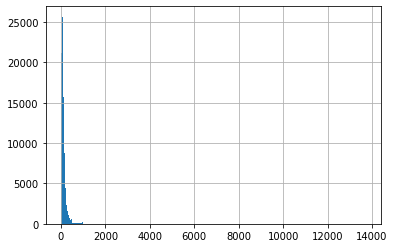

In [3]:
df_input.price.hist(bins=300)

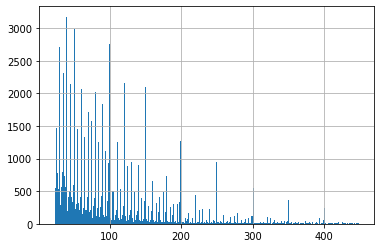

In [4]:
df.price.hist(bins=300)

The costest listing is 13700 dollars/night for 7 people. It's also strange to note that the price is 0 dollars/night for some listings which is not ideally possible. So, we are dropping 2.5 quantile from both extremes - low and high in the data processing notebook.

In [5]:
df_input.loc[df_input['price'].idxmax()][['id','name','price', 'accommodates']]

id                    28169774
name            Dome Penthouse
price                    13700
accommodates                 7
Name: 57306, dtype: object

#### Frequency of listings in Neighbourhoods

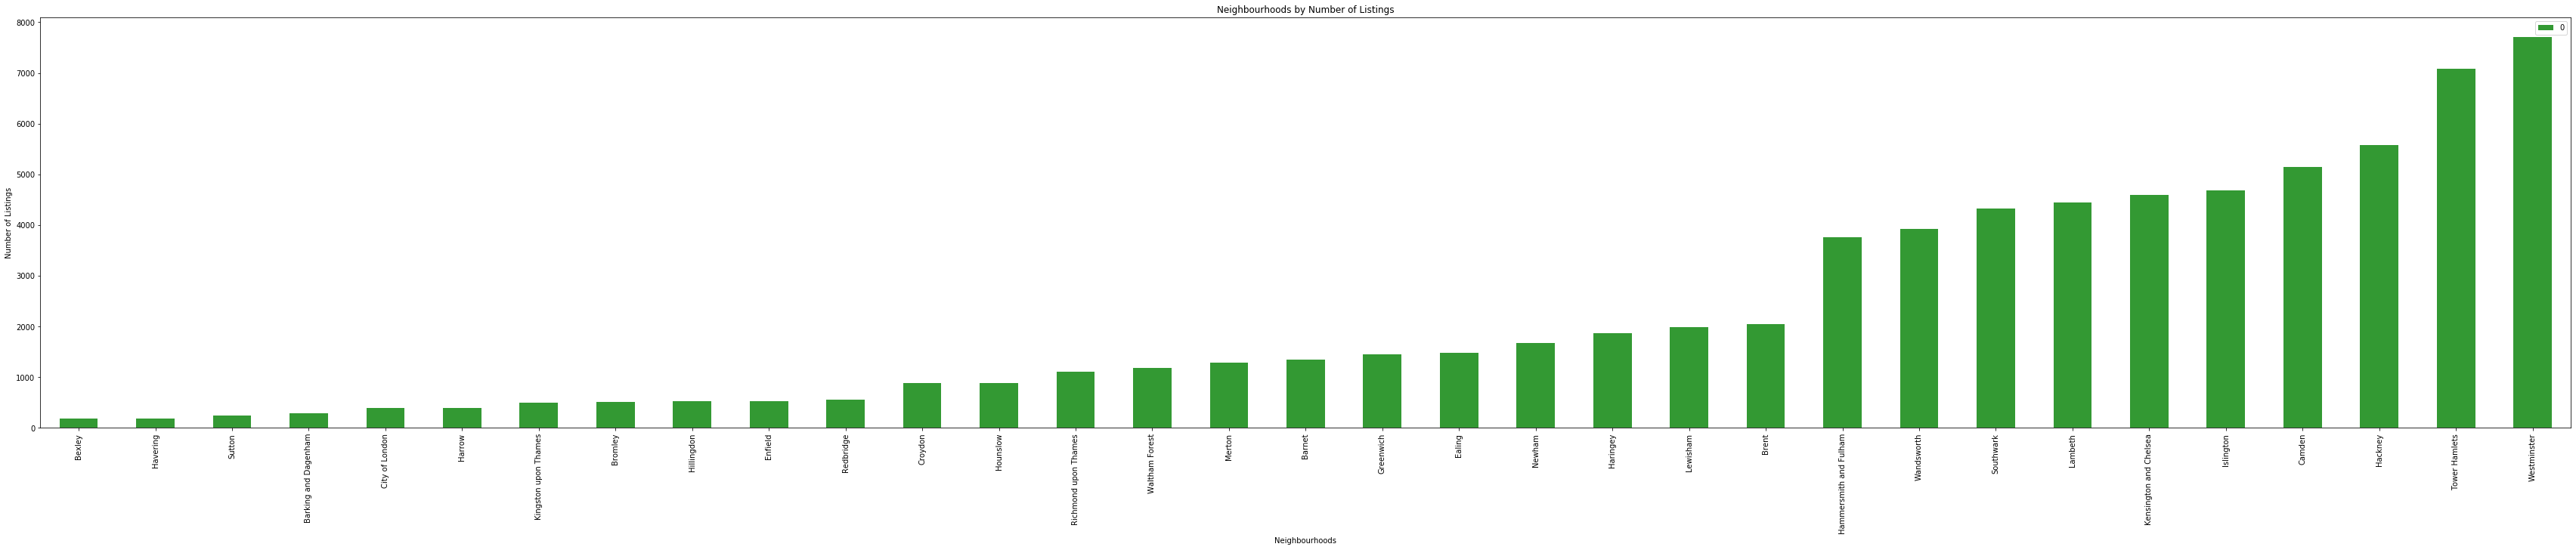

Number of Neighbourhoods: 33


In [6]:
nb_count = Counter(df.neighbourhood_cleansed)
nb_freq = pd.DataFrame.from_dict(nb_count, orient='index').sort_values(by=0)

# Plotting
ax = nb_freq.plot(kind='bar', figsize = (60,10), color = "green" , alpha = 0.80)
ax.set_title("Neighbourhoods by Number of Listings")
ax.set_xlabel("Neighbourhoods")
ax.set_ylabel("Number of Listings")
plt.show()

print("Number of Neighbourhoods:", len(nb_count))

### Relation between price and Number of Reviews
Number of reviews will be more for lower cost places which is evident from below figure.
If there are negative reviews, people won't go to that place and the number of reviews will go down.
So lower the price and better the place, more will be number of reviews.

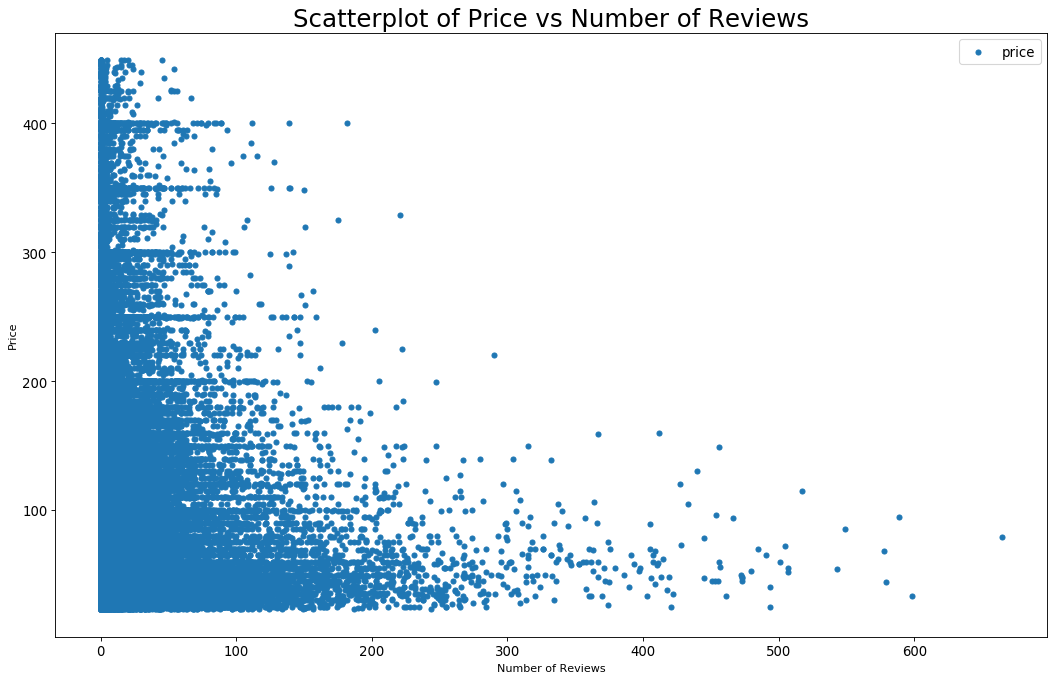

In [7]:
# Draw Plot
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('number_of_reviews', 'price',data=df, s=20)
# Decorations
plt.gca().set(xlabel='Number of Reviews', ylabel='Price')
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12)
plt.title("Scatterplot of Price vs Number of Reviews", fontsize=22)
plt.legend(fontsize=12)    
# plt.show() 
plt.savefig('Visualization_Output\PriceReviews.png')

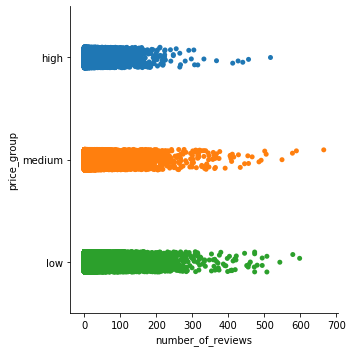

In [8]:
sns_plot = sns.catplot(x="number_of_reviews", y="price_group", order=["high", "medium", "low"], data=df);
sns_plot.savefig("Visualization_Output\PriceReviews2.png")

### Price vs Minimum nights
Generally, Lower price listings should have less minimum number of nights.
But we don't see such strong relation between them.

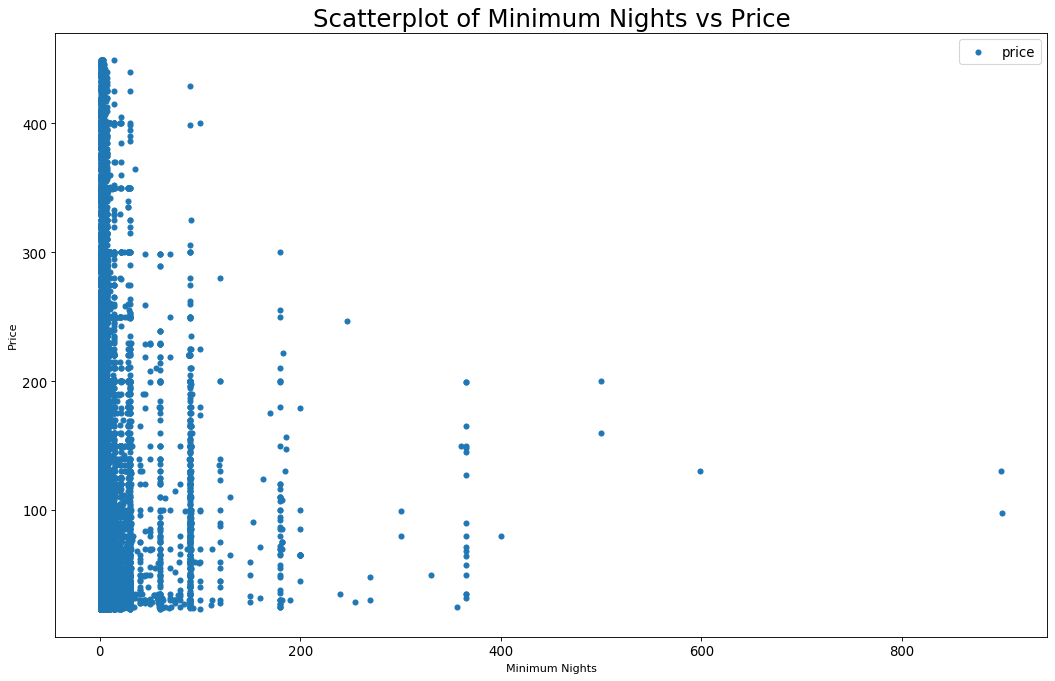

In [9]:
# Draw Plot
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('minimum_nights', 'price',data=df, s=20)
# Decorations
plt.gca().set(xlabel='Minimum Nights', ylabel='Price')
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12)
plt.title("Scatterplot of Minimum Nights vs Price", fontsize=22)
plt.legend(fontsize=12)    
plt.savefig('Visualization_Output\PriceMinNights.png')

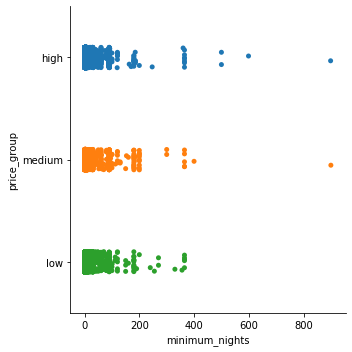

In [10]:
sns_plot = sns.catplot(x="minimum_nights", y="price_group", order=["high", "medium", "low"], data=df);
sns_plot.savefig("Visualization_Output\PriceMinNights2.png")

### Room Type vs Price
Prices are high for entire apt which is as expected. Then for private rooms followed by shared rooms. This variable has good correlation with price.

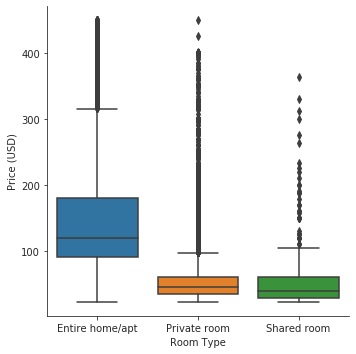

In [11]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("room_type", "price", data=df, kind="box")
    g.set_axis_labels("Room Type", "Price (USD)");
g.savefig("Visualization_Output\PriceRoomType.png")

### Number of Listings vs Price
We don't see much correlation of number of listings with price using the below graph.

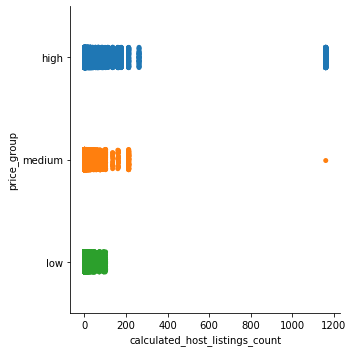

In [12]:
sns_plot = sns.catplot(x="calculated_host_listings_count", y="price_group", order=["high", "medium", "low"], data=df);
sns_plot.savefig("Visualization_Output\PriceHostListings.png")

### Availability vs Price
There is no correlation of price with availability features.

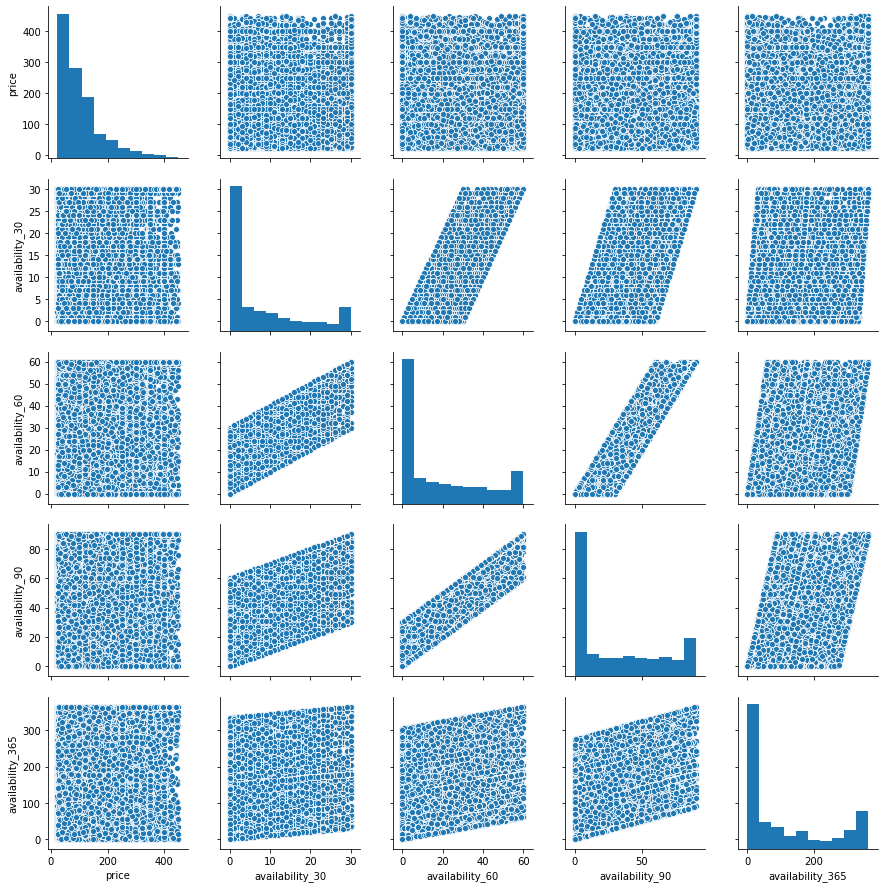

In [13]:
sns_plot = sns.pairplot(df[["price", "has_availability", "availability_30", "availability_60","availability_90", "availability_365"]])
sns_plot.savefig("Visualization_Output\PairPlot2.png")

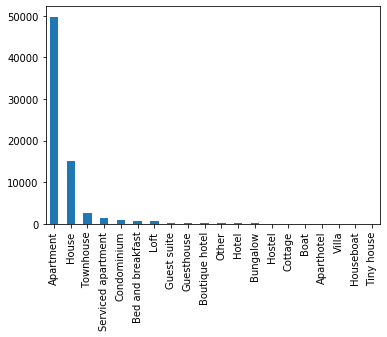

In [14]:
df['property_type'].value_counts()[:20].plot(kind='bar')
# plt.figure()
plt.savefig('Visualization_Output\FreqOfPropertyType.png')